In [1]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
word_index = reuters.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])
for _ in train_data[0]:
    print(word_index.get(_-3))

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [5]:
train_labels[0]

np.int64(3)

In [6]:
train_data.shape

(8982,)

In [7]:
def vectorizar(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))  # Fix: dimensions as tuple
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [8]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [9]:
from keras.utils import to_categorical

In [10]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

d:\david\learning_platzi\machine_learning\redes_neuronales\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer= 'rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [33]:
history = model.fit(partial_x_train, partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4422 - loss: 2.7948 - val_accuracy: 0.6300 - val_loss: 1.8341
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6776 - loss: 1.5438 - val_accuracy: 0.6920 - val_loss: 1.3679
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7378 - loss: 1.1738 - val_accuracy: 0.7460 - val_loss: 1.1892
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7939 - loss: 0.9532 - val_accuracy: 0.7600 - val_loss: 1.0764
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8281 - loss: 0.7942 - val_accuracy: 0.7850 - val_loss: 1.0023
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8566 - loss: 0.6603 - val_accuracy: 0.8020 - val_loss: 0.9591
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8800 - loss: 0.5546 - val_accuracy: 0.7990 - val_loss: 0.9246
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8993 - loss: 0.4707 - val_accuracy: 0.8010 - val_loss:

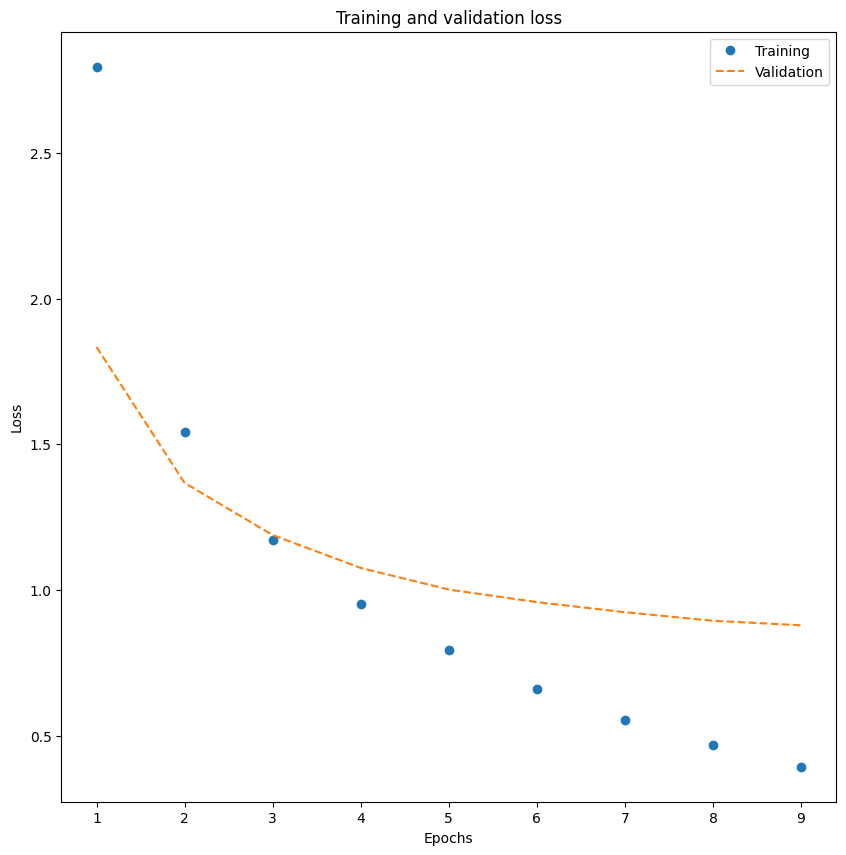

In [34]:
import matplotlib.pyplot as plt

history_dic = history.history
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']

fig = plt.figure(figsize=(10,10))
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'o', label='Training')
plt.plot(epochs, val_loss_values, '--', label='Validation')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

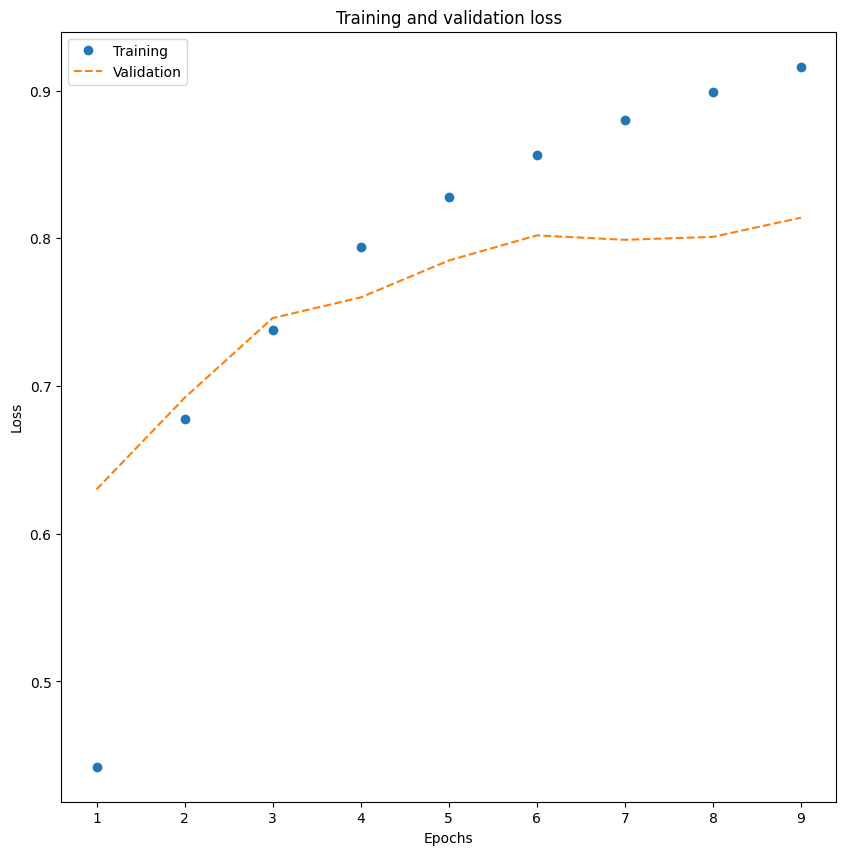

In [35]:
history_dic = history.history
loss_values = history_dic['accuracy']
val_loss_values = history_dic['val_accuracy']

fig = plt.figure(figsize=(10,10))
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'o', label='Training')
plt.plot(epochs, val_loss_values, '--', label='Validation')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7783 - loss: 0.9390


[0.9390332102775574, 0.7782725095748901]

In [37]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [38]:
predictions[0]

array([2.22144881e-05, 7.18809257e-04, 2.39777928e-05, 9.54165280e-01,
       2.76056770e-02, 3.90262176e-05, 2.05415810e-04, 3.41013256e-05,
       3.77747463e-03, 1.00971170e-04, 2.13483308e-05, 1.44665036e-03,
       6.80722005e-05, 2.33795587e-03, 1.02815466e-04, 7.31811306e-05,
       1.08618860e-03, 7.82181887e-05, 2.93186768e-05, 2.41083093e-03,
       9.48682544e-04, 1.29087840e-03, 4.66896417e-05, 1.72704851e-04,
       4.88691194e-06, 4.15006769e-04, 1.90966195e-04, 1.20501581e-05,
       3.51381459e-05, 1.99145958e-04, 1.47929995e-05, 2.59545865e-04,
       9.62110134e-05, 1.45452786e-05, 5.66152885e-05, 1.87403111e-05,
       1.20277598e-03, 3.42195995e-06, 1.92600026e-04, 1.81983822e-04,
       3.29920363e-06, 2.46465846e-04, 1.33659423e-05, 1.91308081e-05,
       8.46049534e-06, 4.37900326e-06], dtype=float32)

In [39]:
np.sum(predictions[0])

np.float32(0.99999994)

In [40]:
np.argmax(predictions[0])

np.int64(3)